<a href="https://colab.research.google.com/github/JuanNoraB/cervical_cancer_cell_classification/blob/main/train_model_afer_finetuning/Cell_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import Counter
import cv2, os

# Data Preprocessing

Conect to the drive 


In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


#Load the dataset 

In [ ]:
dataset_pathTRAIN = '/content/drive/MyDrive/DB_4/train'
dataset_pathValidation = '/content/drive/MyDrive/DB_4/validation'
NumeroImg = 4000


train_dir = '/content/drive/MyDrive/DB_4/train'
train_folders = os.listdir(train_dir)
test_dir = '/content/drive/MyDrive/DB_4/validation'
test_files = os.listdir(test_dir)

#Load necesary libraries

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from collections import Counter
import cv2, os
 #what kinds of classes are in this dataset
#dataset_pathTRAINdir = os.listdir('/content/drive/MyDrive/Computer Vision/Final-Project/DB_4/train')
dataset_pathTRAINdir = os.listdir('/content/drive/MyDrive/DB_4/train')
dataset_pathTRAINdir.sort()
print(dataset_pathTRAIN)
print("Types of classes labels found: ", len(dataset_pathTRAINdir))

#dataset_pathValidationDir = os.listdir('/content/drive/MyDrive/Computer Vision/Final-Project/DB_4/validation')
dataset_pathValidationDir = os.listdir('/content/drive/MyDrive/DB_4/validation')
dataset_pathValidationDir.sort()



/content/drive/MyDrive/DB_4/train
Types of classes labels found:  4


#Load in a list of tuples with all the elements of our data trian and validation data with their respective labels

In [ ]:
class_labels = []

for item in dataset_pathTRAINdir:
 all_classes = os.listdir('/content/drive/MyDrive/DB_4/train'+ '/' +item)
 count = 0
 for room in all_classes:
   if count <= NumeroImg:
      count+=1
      class_labels.append((item, str('dataset_path' + '/' +item) + '/' + room))

In [ ]:
print(class_labels)

[('1', 'dataset_path/1/train_1_257.jpg'), ('1', 'dataset_path/1/train_1_395.jpg'), ('1', 'dataset_path/1/train_1_621.jpg'), ('1', 'dataset_path/1/train_1_455.jpg'), ('1', 'dataset_path/1/train_1_495.jpg'), ('1', 'dataset_path/1/train_1_806.jpg'), ('1', 'dataset_path/1/train_1_591.jpg'), ('1', 'dataset_path/1/train_1_505.jpg'), ('1', 'dataset_path/1/train_1_154.jpg'), ('1', 'dataset_path/1/train_1_231.jpg'), ('1', 'dataset_path/1/train_1_448.jpg'), ('1', 'dataset_path/1/train_1_25.jpg'), ('1', 'dataset_path/1/train_1_240.jpg'), ('1', 'dataset_path/1/train_1_964.jpg'), ('1', 'dataset_path/1/train_1_334.jpg'), ('1', 'dataset_path/1/train_1_26.jpg'), ('1', 'dataset_path/1/train_1_504.jpg'), ('1', 'dataset_path/1/train_1_813.jpg'), ('1', 'dataset_path/1/train_1_160.jpg'), ('1', 'dataset_path/1/train_1_871.jpg'), ('1', 'dataset_path/1/train_1_881.jpg'), ('1', 'dataset_path/1/train_1_87.jpg'), ('1', 'dataset_path/1/train_1_139.jpg'), ('1', 'dataset_path/1/train_1_936.jpg'), ('1', 'dataset_pat

In [ ]:
class_labels_val = []

for item in dataset_pathValidationDir:
 all_classes = os.listdir('/content/drive/MyDrive/DB_4/validation'+ '/' +item)
 count = 0
 for room in all_classes:
   if count <= NumeroImg:
      count+=1
      class_labels_val.append((item, str('dataset_path' + '/' +item) + '/' + room))
print(class_labels_val)

[('1', 'dataset_path/1/validation_1_54.jpg'), ('1', 'dataset_path/1/validation_1_127.jpg'), ('1', 'dataset_path/1/validation_1_22.jpg'), ('1', 'dataset_path/1/validation_1_136.jpg'), ('1', 'dataset_path/1/validation_1_48.jpg'), ('1', 'dataset_path/1/validation_1_132.jpg'), ('1', 'dataset_path/1/validation_1_45.jpg'), ('1', 'dataset_path/1/validation_1_161.jpg'), ('1', 'dataset_path/1/validation_1_68.jpg'), ('1', 'dataset_path/1/validation_1_74.jpg'), ('1', 'dataset_path/1/validation_1_29.jpg'), ('1', 'dataset_path/1/validation_1_84.jpg'), ('1', 'dataset_path/1/validation_1_23.jpg'), ('1', 'dataset_path/1/validation_1_2.jpg'), ('1', 'dataset_path/1/validation_1_42.jpg'), ('1', 'dataset_path/1/validation_1_106.jpg'), ('1', 'dataset_path/1/validation_1_98.jpg'), ('1', 'dataset_path/1/validation_1_28.jpg'), ('1', 'dataset_path/1/validation_1_108.jpg'), ('1', 'dataset_path/1/validation_1_134.jpg'), ('1', 'dataset_path/1/validation_1_198.jpg'), ('1', 'dataset_path/1/validation_1_143.jpg'), (

##Data frame for the Data train and data validation

In [ ]:
df_train = pd.DataFrame(data=class_labels, columns=['Labels', 'image'])
df_train

,Labels,image
0,1,dataset_path/1/train_1_257.jpg
1,1,dataset_path/1/train_1_395.jpg
2,1,dataset_path/1/train_1_621.jpg
3,1,dataset_path/1/train_1_455.jpg
4,1,dataset_path/1/train_1_495.jpg
...,...,...
3995,4,dataset_path/4/train_4_523.jpg
3996,4,dataset_path/4/train_4_818.jpg
3997,4,dataset_path/4/train_4_401.jpg
3998,4,dataset_path/4/train_4_867.jpg


In [ ]:
df_val = pd.DataFrame(data=class_labels_val, columns=['Labels', 'image'])
df_val

,Labels,image
0,1,dataset_path/1/validation_1_54.jpg
1,1,dataset_path/1/validation_1_127.jpg
2,1,dataset_path/1/validation_1_22.jpg
3,1,dataset_path/1/validation_1_136.jpg
4,1,dataset_path/1/validation_1_48.jpg
...,...,...
795,4,dataset_path/4/validation_4_126.jpg
796,4,dataset_path/4/validation_4_27.jpg
797,4,dataset_path/4/validation_4_67.jpg
798,4,dataset_path/4/validation_4_172.jpg


#Prepare the images for the model

In [ ]:
import cv2
im_size = 250
images_TRAIN = []
labels_TRAIN = []
for i in dataset_pathTRAINdir:
    count = 0
    data_path =  '/content/drive/MyDrive/DB_4/train' + '/' + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
    for f in filenames:
        if count <= NumeroImg:
          count +=1 
          img = cv2.imread(data_path + '/' + f)
          img = cv2.resize(img, (im_size, im_size))
          images_TRAIN.append(img)
          labels_TRAIN.append(i)

images_Validation = []
labels_Validation = []


for i in dataset_pathValidationDir:
    count = 0
    data_path = '/content/drive/MyDrive/DB_4/validation' + '/' + str(i)  
    filenames = [i for i in os.listdir(data_path) ]
    for f in filenames:
        if count <= NumeroImg:
          count +=1 
          img = cv2.imread(data_path + '/' + f)
          img = cv2.resize(img, (im_size, im_size))
          images_Validation.append(img)
          labels_Validation.append(i)

images_TRAIN = np.array(images_TRAIN)
images_Validation = np.array(images_Validation)
 


##Show Size of our data

In [ ]:
#data trianing 
print(images_TRAIN.shape)
print(np.array(labels_TRAIN).shape)
#data Validation
print(images_Validation.shape)
print(np.array(labels_Validation).shape)

(4000, 250, 250, 3)
(4000,)
(800, 250, 250, 3)
(800,)


#Prepare labels

In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y=df_train['Labels'].values
print(y)
y_labelencoder = LabelEncoder ()
y = y_labelencoder.fit_transform (y)
print (y)

['1' '1' '1' ... '4' '4' '4']
[0 0 0 ... 3 3 3]


In [ ]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
y2=df_val['Labels'].values
print(y2)
y2_labelencoder = LabelEncoder ()
y2 = y2_labelencoder.fit_transform (y2)
print(y2)

['1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1' '1'
 '1' '1' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2'
 '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2' '2

In [ ]:
y=y.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y = ct.fit_transform(y).toarray()
Y


array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [ ]:
y2=y2.reshape(-1,1)

from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('my_ohe', OneHotEncoder(), [0])], remainder='passthrough')
Y2 = ct.fit_transform(y2).toarray()
Y2

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

In [ ]:
print(images_TRAIN.shape)
print(Y.shape)
print(images_Validation.shape)
print(Y2.shape)


(4000, 250, 250, 3)
(4000, 4)
(800, 250, 250, 3)
(800, 4)


In [ ]:
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split


images_TRAIN, Y = shuffle(images_TRAIN, Y, random_state=1)
#train_x, test_x, train_y, test_y = train_test_split(images, Y, test_size=0.08, random_state=415)

X_train, X_val, y_train, y_val = train_test_split(images_TRAIN, Y, test_size=0.2, random_state=1)
images_Validation,Y2 =shuffle(images_Validation,Y2,random_state=1)
X_test, y_test = images_Validation,Y2
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=1) # 0.25 x 0.8 = 0.2

#inpect the shape of the training and testing.
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(X_val.shape)
print(y_val.shape)

(3200, 250, 250, 3)
(3200, 4)
(800, 250, 250, 3)
(800, 4)
(800, 250, 250, 3)
(800, 4)


#Visualization Data

In [ ]:
def next_batch(batch_size, data, labels):
    idx = np.arange(0, len(data))
    np.random.shuffle(idx)
    idx = idx[: batch_size]
    data_shuffle = [data[i] for i in idx]
    labels_shuffle = [labels[i] for i in idx]
    return np.asarray(data_shuffle), np.asarray(labels_shuffle)

def display_images(data, title, display_label = True):
    x, y = data

    
    fig, axes = plt.subplots(6, 4, figsize = (16,16))
    fig.subplots_adjust(hspace = 0.1, wspace = 0.5)
    fig.suptitle(title, fontsize = 15)

    for i, ax in enumerate(axes.flat):
        ax.imshow(x[i])
        if display_label:
            ax.set_xlabel(y[i])
        ax.set_xticks([])
        ax.set_yticks([])
    plt.show()

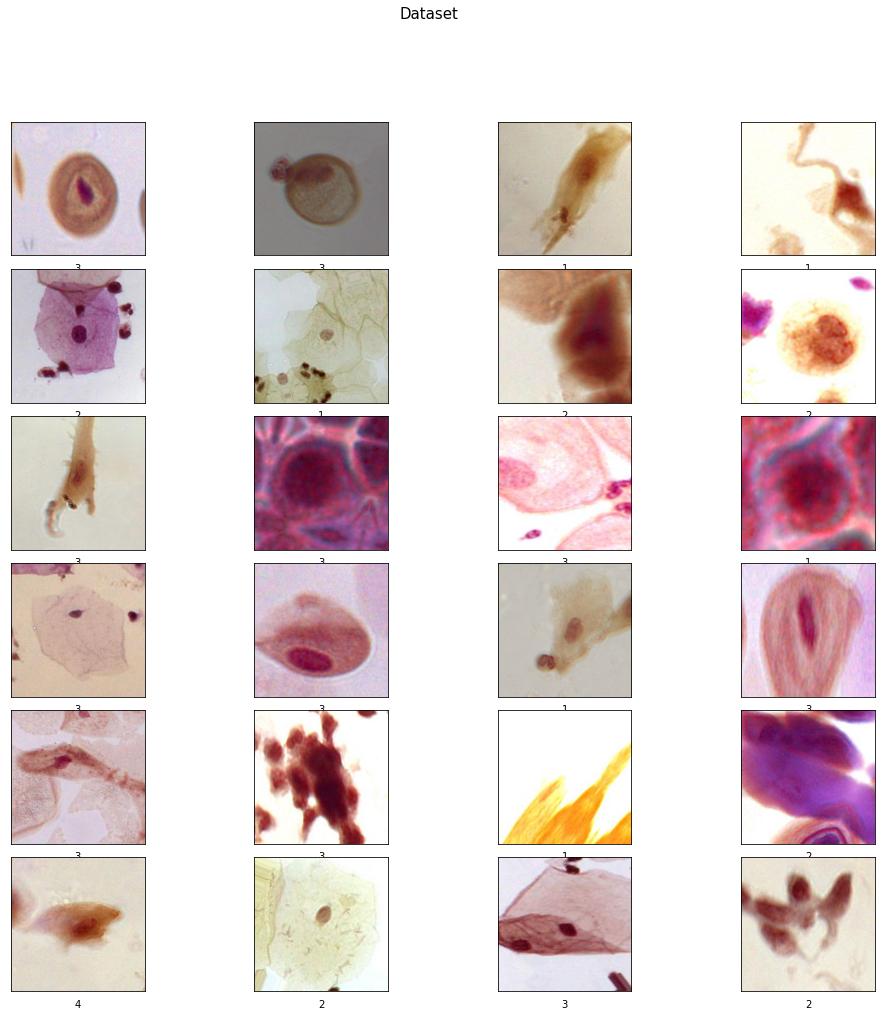

In [ ]:
display_images(next_batch(32, X_train, labels_TRAIN), title="Dataset")

# Transfer Learning

#Import libraires

In [ ]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input
from tensorflow.keras import layers
from tensorflow.keras.applications import EfficientNetB7
import numpy as np
import tensorflow as tf

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import os

NUM_CLASSES = 4
IMG_SIZE = 250

In [ ]:
# fix random seed for reproducibility
seed = 7
tf.random.set_seed(seed)


In [ ]:
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.layers import Activation, Dense
from keras.models import Sequential
from tensorflow.keras.applications import ResNet152
from tensorflow.keras.metrics import Recall, Precision, AUC
#from keras.models import Dense
def specificity(y_true, y_pred):
    true_negatives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(1 - y_true, 0, 1)) * tf.keras.backend.round(tf.keras.backend.clip(1 - y_pred, 0, 1)))
    possible_negatives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(1 - y_true, 0, 1)))
    return true_negatives / (possible_negatives + tf.keras.backend.epsilon())

def build_model(optimizer,learning_rate,dropout_rate):
    inputs = layers.Input(shape=(250, 250, 3))
    #x = img_augmentation(inputs)
    x = inputs
    model = ResNet152(include_top=False, input_tensor=x, weights="imagenet")

    # Freeze the pretrained weights
    model.trainable = False

    # Rebuild top
    x = layers.GlobalAveragePooling2D(name="avg_pool")(model.output)
    x = layers.BatchNormalization()(x)

    top_dropout_rate = dropout_rate
    x = layers.Dropout(top_dropout_rate, name="top_dropout")(x)

    x = layers.Dense(64,activation="relu",name="second_layer")(x)
    x = layers.Dropout(top_dropout_rate, name="top_dropout2")(x)

    #x = layers.Dense(8,activation="relu",name="thrid_layer")(x)
    #x = layers.Dropout(top_dropout_rate, name="top_dropout3")(x)

    outputs = layers.Dense(NUM_CLASSES, activation="softmax", name="pred")(x)

    # Compile
    model = tf.keras.Model(inputs, outputs, name="EfficientNetB1")
    optimizer = optimizer(learning_rate=learning_rate)
    #optimizer = tf.keras.optimizers.Adam(learning_rate=1e-2)
    model.compile(
        optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy",Recall(), Precision(), specificity]
    )
    return model


In [ ]:
model= build_model(tf.keras.optimizers.SGD,0.01,0.2)

234698864/234698864 [==============================] - 11s 0us/step


In [ ]:
model.summary()

Model: "EfficientNetB1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 250, 250, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 256, 256, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 125, 125, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                     

In [ ]:
print(X_train.shape)
print(y_train.shape)
X = np.concatenate((X_train, X_val), axis=0)
y = np.concatenate((y_train, y_val), axis=0)
print(X.shape)
print(y.shape)

(3200, 250, 250, 3)
(3200, 4)
(4000, 250, 250, 3)
(4000, 4)


In [ ]:
#NO EJECUTEN
from sklearn.model_selection import PredefinedSplit
n_samples = X.shape[0]
test_fold = np.zeros(n_samples)
test_fold[:len(X_val)] = 0
test_fold[len(X_val):] = -1
ps = PredefinedSplit(test_fold=test_fold)


model = KerasClassifier(build_fn=build_model, epochs=20, batch_size=16, verbose=2)

param_grid = {'optimizer': [ tf.keras.optimizers.SGD],
              'learning_rate': [0.01],
              'dropout_rate': [0.2]}


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=ps,verbose=2)


In [ ]:
%load_ext tensorboard
import datetime
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback2 = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)



In [ ]:
#NO EJECUTEN
batch_size=[16,32,64]
def batch(batch_size):
  for i in batch_size:
    model = KerasClassifier(build_fn=build_model, epochs=30, batch_size=i, verbose=2)
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=ps,verbose=2)
    grid_search.fit(X, y,callbacks=[tensorboard_callback2, tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=5)])
    print("Best parameters found: ", grid_search.best_params_)


In [ ]:
batch(batch_size) #NO EJECUTEN

NameError: ignored

Fitting 1 folds for each of 27 candidates, totalling 27 fits

Epoch 1/20
200/200 - 52s - loss: 1.3065 - accuracy: 0.8153 - 52s/epoch - 260ms/step

Epoch 2/20
200/200 - 43s - loss: 0.8863 - accuracy: 0.8784 - 43s/epoch - 216ms/step
Epoch 3/20

water vending machine

In [ ]:
import matplotlib.pyplot as plt


def plot_hist(hist):
    plt.plot(hist.history["accuracy"], marker="o")
    plt.plot(hist.history["val_accuracy"], marker="s")
    
    plt.ylabel("Accuracy")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Validation"], loc="lower right")
    plt.xticks(range(0, 60, 5)) # Agregar esta línea
    plt.yticks(np.arange(0.7, 1, 0.02))
    plt.savefig('metrics_result_train_acurracy.png')
    plt.show()


#plot_hist(hist)

In [ ]:
import matplotlib.pyplot as plt


def plot_loss(hist):
    plt.plot(hist.history["loss"], marker="o")
    plt.plot(hist.history["val_loss"], marker="s")
    
    plt.ylabel("Loss")
    plt.xlabel("Epoch")
    plt.legend(["Train", "Validation"], loc="upper right")
    plt.xticks(range(0, 60, 5)) # Agregar esta línea
    plt.yticks(np.arange(0.05, 0.6, 0.1))
    plt.savefig('metrics_result_train.png')
    plt.show()



Epoch 1/50
200/200 - 75s - loss: 0.6327 - accuracy: 0.7469 - recall_1: 0.6994 - precision_1: 0.7950 - specificity: 0.9399 - val_loss: 0.3348 - val_accuracy: 0.8737 - val_recall_1: 0.8475 - val_precision_1: 0.9150 - val_specificity: 0.9737 - 75s/epoch - 374ms/step
Epoch 2/50
200/200 - 56s - loss: 0.3504 - accuracy: 0.8709 - recall_1: 0.8509 - precision_1: 0.8875 - specificity: 0.9641 - val_loss: 0.2347 - val_accuracy: 0.9087 - val_recall_1: 0.8875 - val_precision_1: 0.9173 - val_specificity: 0.9733 - 56s/epoch - 280ms/step
Epoch 3/50
200/200 - 56s - loss: 0.2651 - accuracy: 0.8991 - recall_1: 0.8816 - precision_1: 0.9135 - specificity: 0.9722 - val_loss: 0.1954 - val_accuracy: 0.9225 - val_recall_1: 0.9112 - val_precision_1: 0.9322 - val_specificity: 0.9779 - 56s/epoch - 278ms/step
Epoch 4/50
200/200 - 52s - loss: 0.2327 - accuracy: 0.9112 - recall_1: 0.9013 - precision_1: 0.9202 - specificity: 0.9740 - val_loss: 0.1717 - val_accuracy: 0.9337 - val_recall_1: 0.9225 - val_precision_1: 0.

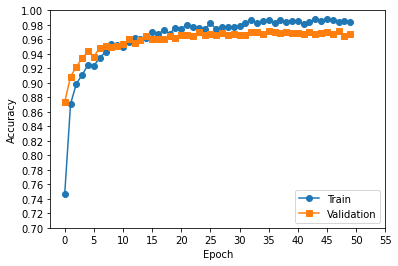

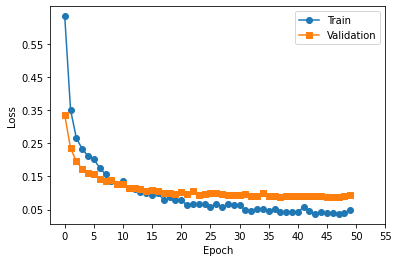

In [ ]:
seed = 7
tf.random.set_seed(seed)
epochs = 50
hist4 = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_val, y_val), callbacks=[tensorboard_callback2, tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=20)],batch_size=16, verbose=2)
plot_hist(hist4)
plot_loss(hist4)

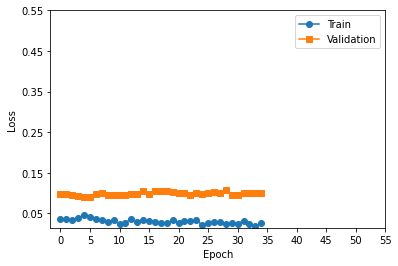

In [ ]:
plot_loss(hist4)

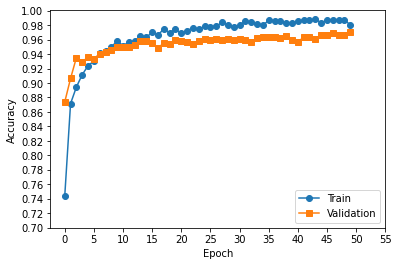

In [ ]:
plot_hist(hist4)

#Guardar el modelo

In [ ]:
# Save the model to a file
model.save('/content/drive/MyDrive/DB_4/models/model_resnet125_250x250_2.h5')

#Cargar modelo y evaluar


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import load_model

# Define the specificity function
def specificity(y_true, y_pred):
    true_negatives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(1 - y_true, 0, 1)) * tf.keras.backend.round(tf.keras.backend.clip(1 - y_pred, 0, 1)))
    possible_negatives = tf.keras.backend.sum(tf.keras.backend.round(tf.keras.backend.clip(1 - y_true, 0, 1)))
    return true_negatives / (possible_negatives + tf.keras.backend.epsilon())

# Load the saved model
model = load_model('/content/drive/MyDrive/DB_4/models/model_resnet125_250x250_1.h5', custom_objects={'specificity': specificity})


In [ ]:
preds = model.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

25/25 [==============================] - 11s 255ms/step - loss: 0.0983 - accuracy: 0.9725 - recall_1: 0.9725 - precision_1: 0.9725 - specificity: 0.9908
Loss = 0.09826213866472244
Test Accuracy = 0.9725000262260437


In [ ]:

preds = model.evaluate(X_test, y_test)
print ("Loss = " + str(preds[0]))
print ("Test Accuracy = " + str(preds[1]))

25/25 [==============================] - 8s 213ms/step - loss: 0.0990 - accuracy: 0.9712
Loss = 0.09900398552417755
Test Accuracy = 0.9712499976158142


#Matriz de confusión

In [ ]:
from sklearn.metrics import confusion_matrix
classes= ['1','2','3','4']
y_pred = model.predict(X_test)
y_pred  = [ classes[i.argmax()] for i in y_pred ]
y_test = [classes[i.argmax()] for i in y_test]
#confusion_matrix(y_test, y_pred)

25/25 [==============================] - 6s 262ms/step


AttributeError: ignored

In [ ]:
print(y_pred)
print(y_test)

['1', '3', '1', '4', '2', '4', '3', '3', '1', '4', '2', '1', '2', '2', '4', '3', '3', '3', '2', '2', '2', '3', '2', '1', '4', '1', '4', '1', '4', '1', '2', '2', '1', '3', '1', '1', '4', '4', '4', '4', '2', '4', '4', '1', '3', '3', '4', '2', '4', '2', '3', '3', '4', '4', '2', '2', '2', '1', '4', '1', '3', '3', '1', '3', '2', '2', '4', '2', '4', '4', '1', '3', '2', '3', '4', '1', '1', '1', '2', '1', '3', '1', '2', '3', '2', '4', '3', '4', '1', '4', '4', '4', '2', '4', '1', '3', '1', '1', '3', '4', '2', '3', '3', '4', '4', '2', '2', '3', '4', '2', '2', '2', '1', '2', '2', '4', '1', '3', '2', '1', '2', '4', '4', '3', '3', '3', '2', '3', '3', '1', '2', '4', '2', '4', '3', '4', '1', '2', '1', '3', '1', '4', '3', '2', '3', '3', '4', '4', '4', '2', '1', '3', '2', '4', '1', '2', '4', '4', '3', '1', '4', '3', '1', '2', '3', '1', '3', '2', '1', '4', '3', '2', '3', '1', '4', '4', '1', '4', '1', '3', '2', '4', '4', '1', '3', '3', '2', '3', '1', '1', '1', '4', '3', '3', '4', '4', '2', '4', '1', '4',

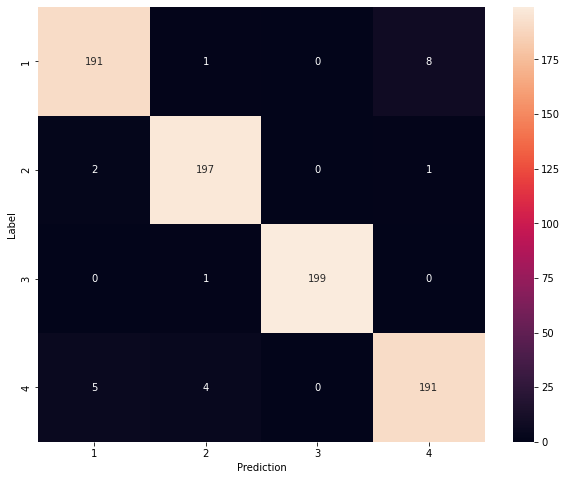

In [ ]:
import seaborn as sns
confusion_matrix(y_test, y_pred)
class_names = ["1", "2", "3", "4"]
predictions = [int(i) for i in y_pred] 
labels = [int(i) for i in y_test]
cm = tf.math.confusion_matrix(labels, predictions)
cm = cm[1:,1:]
plt.figure(figsize=(10, 8))
sns.heatmap(cm, xticklabels=class_names, yticklabels=class_names, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('Label')
plt.savefig('matrix.png')
plt.show()



#TEST

In [ ]:
import random
import time

def results (img_path):
  classes = dataset_pathTRAINdir
  img = cv2.imread(img_path)
  img = cv2.resize(img, (250, 250))
  x = np.expand_dims(img, axis=0)
  x = preprocess_input(x)
  print('Input image shape:', x.shape)
  my_image = imread(img_path)
  imshow(my_image)
  prediction = model.predict(x)
  #predicted = classes[prediction.argmax()]
  preds = np.argmax(prediction)
  print("The predicted result: ",preds+1)
  return preds+1

In [ ]:
print(results('/content/drive/MyDrive/Computer Vision/Final-Project/DB_4/validation/2/validation_2_0.jpg'))